In [13]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import classification_report
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("final_v2.csv")

In [3]:
df.head()

,test/train/unlabeled,isfraud,car_model_1,car_model_2,car_model_3,car_model_4,car_model_5,sharing_type_0,sharing_type_1,age_group_1,...,acc_hour_6,oai_prsn_cnt_missing,oai_prsn_cnt_0,oai_prsn_cnt_1,oai_prsn_cnt_2,oai_prsn_cnt_3,oai_prsn_cnt_4,oai_prsn_cnt_5,network_feature_involved_cnt,h3_feature_top3_share
0,1,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,5,0.413587
1,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,4,0.748059
2,1,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,5,0.738435
3,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,3,0.587487
4,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,6,0.683564


In [4]:
df.isnull().sum()

test/train/unlabeled            0
isfraud                         0
car_model_1                     0
car_model_2                     0
car_model_3                     0
car_model_4                     0
car_model_5                     0
sharing_type_0                  0
sharing_type_1                  0
age_group_1                     0
age_group_2                     0
age_group_3                     0
age_group_4                     0
age_group_5                     0
cum_acc_YN_1                    0
cum_acc_YN_0                    0
type_b2b_b2c_0                  0
type_b2b_b2c_2                  0
pf_type_1                       0
pf_type_2                       0
pf_type_3                       0
socarpass_0                     0
socarpass_1                     0
socarsave_0                     0
socarsave_1                     0
start_hour_1                    0
start_hour_2                    0
start_hour_3                    0
start_hour_4                    0
start_hour_5  

In [5]:
features = df.columns.drop([ 'test/train/unlabeled', 'isfraud'])
label = ['isfraud'] 

print('features', features)
print('label', label)

features Index(['car_model_1', 'car_model_2', 'car_model_3', 'car_model_4',
       'car_model_5', 'sharing_type_0', 'sharing_type_1', 'age_group_1',
       'age_group_2', 'age_group_3', 'age_group_4', 'age_group_5',
       'cum_acc_YN_1', 'cum_acc_YN_0', 'type_b2b_b2c_0', 'type_b2b_b2c_2',
       'pf_type_1', 'pf_type_2', 'pf_type_3', 'socarpass_0', 'socarpass_1',
       'socarsave_0', 'socarsave_1', 'start_hour_1', 'start_hour_2',
       'start_hour_3', 'start_hour_4', 'start_hour_5', 'start_hour_6',
       'b_hour_1', 'b_hour_2', 'b_hour_3', 'b_hour_4', 'b_hour_5',
       'acc_hour_0', 'acc_hour_1', 'acc_hour_2', 'acc_hour_3', 'acc_hour_4',
       'acc_hour_5', 'acc_hour_6', 'oai_prsn_cnt_missing', 'oai_prsn_cnt_0',
       'oai_prsn_cnt_1', 'oai_prsn_cnt_2', 'oai_prsn_cnt_3', 'oai_prsn_cnt_4',
       'oai_prsn_cnt_5', 'network_feature_involved_cnt',
       'h3_feature_top3_share'],
      dtype='object')
label ['isfraud']


(array([351.,   0.,   0.,   0.,   0., 191.,   0.,   0.,   0.,  58.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

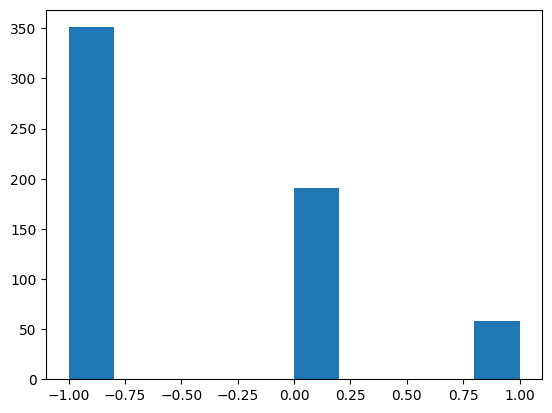

In [6]:
plt.hist(df['isfraud'])

In [7]:
# 트레인 셋 / 테스트 셋 
X_train_labeled = df[df['test/train/unlabeled']==2][features]
Y_train_labeled = df[df['test/train/unlabeled']==2][label]

X_test_labeled = df[df['test/train/unlabeled']==1][features]
Y_test_labeled = df[df['test/train/unlabeled']==1][label]

In [14]:
clf1 = LogisticRegression(random_state=0).fit(X_train_labeled, Y_train_labeled.values.ravel())

# 결과 확인
y = Y_test_labeled
y_pred = clf1.predict(X_test_labeled)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       124
           1       0.32      0.68      0.44        25

    accuracy                           0.70       149
   macro avg       0.62      0.69      0.62       149
weighted avg       0.82      0.70      0.74       149


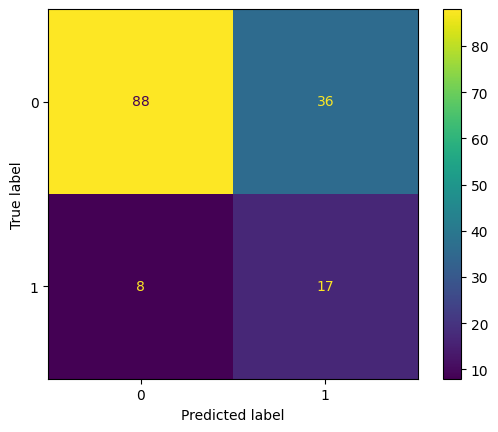

In [15]:
# 평가 
print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(clf1, X_test_labeled, Y_test_labeled)  
plt.show()  

# 보험사기건에 대한 f1-score 0.44를 기록했습니다.